Librosa是一个用于音频、音乐分析、处理的python工具包，一些常见的时频处理、特征提取、绘制声音图形等功能应有尽有，功能十分强大。

# librosa安装
通过pip安装
```
pip install librosa
```
通过annaconda安装
```
conda install -c conda-forge librosa
```

> 由于librosa底层为ffmpeg,需要单独安装ffmpeg,从官网链接下载后,将其中bin目录加入环境变量即可.

In [9]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import wave
import soundfile as sf  

# 获取音频基本信息
wave库为python自带的库,为WAV文件提供了快捷的接口.
通过getparams方法可获得WAV文件基本参数:
+ nchannels 声道数
+ samplewidth 采样宽度
+ framerate 帧速率
+ nframes 帧数
+ comptype 压缩类型标识
+ compname 压缩类型


In [10]:
import wave
with wave.open('Test_1.wav') as f: # 利用with上下文管理器获得文件对象
    params = f.getparams()
print(params)

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=76800, comptype='NONE', compname='not compressed')


# 读写音频

## librosa.load函数
```python3
librosa.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
```
+ 以浮点时间序列的形式加载音频文件。
+ 音频将自动重新采样到给定的采样率(sr)
+ 要保留音频文件的原始采样率，请将sr指定为None
+ 返回值为(y,sr), y为音频时间序列,sr为采样率

In [11]:
import librosa
y, sr = librosa.load('Test_1.wav')
sr,y

(22050,
 array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.3038768e-04, -5.0359042e-05, -6.3312269e-04], dtype=float32))

## soundfile.write函数
由于librosa库基于soundfile库进行读写音频,在安装librosa时,包管理工具会自动安装soundfile依赖,我们只需导入即可.
```python3
soundfile.write(file, data, samplerate, subtype=None, endian=None, format=None, closefd=True)
```
+ 如果文件存在,调用此函数会将其覆盖

In [12]:
# 将读取到的音频时间序列以三种不同的格式重新写入文件
import soundfile as sf

# 24bit PCM WAV
sf.write('file.wav', y, sr, subtype='PCM_24')

# 24bit Flac
sf.write('file.flac', y, sr, format='flac', subtype='PCM_24')

# 16bit OGG
sf.write('file.ogg', y, sr, format='ogg', subtype='vorbis')

## IPython.display.Audio函数播放音频
```python3
class IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)
```
+ 在笔记本中播放显示音频控件,并播放音频



In [13]:
# 播放音频
from IPython import display
display.Audio(filename='Test_1.wav',autoplay=True)

# 波形图,频谱图,语谱图


## 利用librosa.display.waveshow函数绘制波形图
```python3
librosa.display.waveshow(y, sr=22050, max_points=11025, x_axis='time', offset=0.0, marker='', where='post', label=None, ax=None, **kwargs)
```
+ 在时域中可视化波形
+ 输入y为音频时间序列,sr为采样率

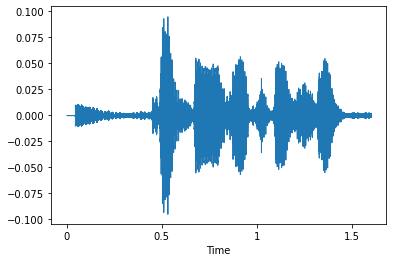

In [14]:
librosa.display.waveshow(y, sr)

## 绘制频谱图
> 通过傅里叶变换是对一个信号进行分析，可以给出信号中包含的波以及幅值。
```python3
fft.fft(a, n=None, axis=- 1, norm=None)
```
计算一维离散傅里叶变换。
该函数使用高效的快速傅里叶变换(FFT)算法[CT]计算一维n点离散傅里叶变换(DFT)。
```python3
fft.fftfreq(n, d=1.0)
```
返回离散傅里叶变换的采样频率。
返回的浮点数数组f包含以每单位样本间隔的周期为中心的频率箱(以零开始)。例如，如果采样间隔以秒为单位，则频率单位为周/秒。


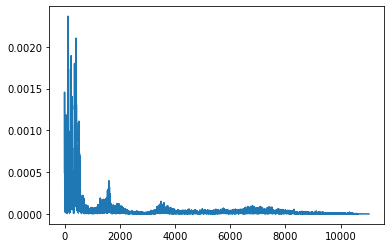

In [15]:
from numpy.fft import fft,fftfreq
N = len(y)
yf = fft(y)
xf = fftfreq(N,1/sr)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

## 绘制语谱图
```python3
librosa.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='reflect')
```
> 该函数实现了短时傅里叶变换(STFT)。
STFT通过计算短重叠窗上的离散傅里叶变换(DFT)在时频域中表示信号。

```python3
librosa.display.specshow(data, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12, key='C:maj', Sa=None, mela=None, thaat=None, auto_aspect=True, htk=False, ax=None, **kwargs)
```
> 该函数展示data矩阵所代表的语谱图(spectrogram)
+ x_axis/y_axis:(None or str)
  + ‘linear’, ‘fft’, ‘hz’：频率范围由 FFT 窗口和采样率决定。
  + ‘log’ ：频谱以对数刻度显示。
  + ‘fft_note’：频谱显示在对数刻度上，并标记了音高。
  + ‘mel’：频率由梅尔标度决定。
+ sr 采样率
+ ax: matplotlib.axes.Axes对象

```python3
librosa.amplitude_to_db(S, ref=1.0, amin=1e-05, top_db=80.0)
```
> 将幅度谱图转换为 dB 标度的谱图。
+ 输入S: 输入的幅度
+ 输出S_db: 转换为db

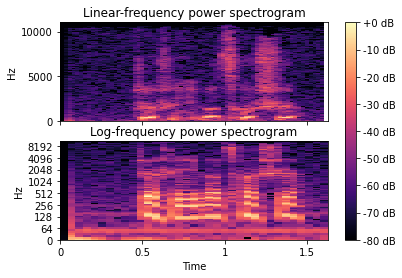

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")